
# **Assignment 1**

# Srujana Vanka - 2020102005

In [ ]:
# Importing librabies
import numpy as np
import pandas as pd 
import cv2
import matplotlib.pyplot as plt
import os
%matplotlib inline
from google.colab.patches import cv2_imshow 
import math
import time 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/images/
%ls

## Question 3

### Part 1

In [ ]:
def piecewiseLinTransform(image, K1, K2, a, b):
  # # Extract the heights and width of the image
  h,w = image.shape

  # Iterating over all values in the range
  for i in range(h):
    for j in range(w):
      z = image[i][j]/255
      for k in range(len(K1)):
        # g(z) = K1[i]*z + K2[i] for a[i] <= z <= b[i]
        if((z>=a[k]) and (z<b[k])):
          z = (K1[k]*z + K2[k])*255
          break
      image[i][j] = z

  return image

## Steps to follow

### 1. Piecewise Linear Transformation function is defined by:
 g(z) = K1[i]*z + K2[i] for a[i] <= z <= b[i]

where, 
 z = input intensity (generally ranging from 0 − 255)

i = ith piecewise linear transform.
### 2. Obtain the k1,k2,a,b values for the given patterns. 
- This is done on close examination of the ranges for a,b. 
- The k1,k2 are obtained by using y=mx+c(k1=m,k2=c) line where we have end points for each range

### 3. On calling the fuction piecewiseLinTransfrom we loop through the pixels and modify for output only for regions within a,b after normalisation.


### Part 2

The piecewise function for pam1 is:

$y = \begin{cases} 
      2x+0.1 &, 0 \leq x < 0.2\\
      0.7-x &, 0.2 \leq x < 0.4 \\
      x-0.1 &, 0.4 \leq x < 1
   \end{cases}
$

The piecewise function for pam2 is:

$y = \begin{cases} 
      0 &, 0 \leq x < 0.2\\
      0.2 &, 0.2 \leq x < 0.4 \\
      0.4 &, 0.4 < x < 0.6 \\
      0.6 &, 0.6 \leq x < 0.8 \\
      0.8 &, 0.8 < x < 1 \\
      1 & , x = 1
   \end{cases}
$

Text(0.5, 1.0, 'Transformed Image - Pam2')

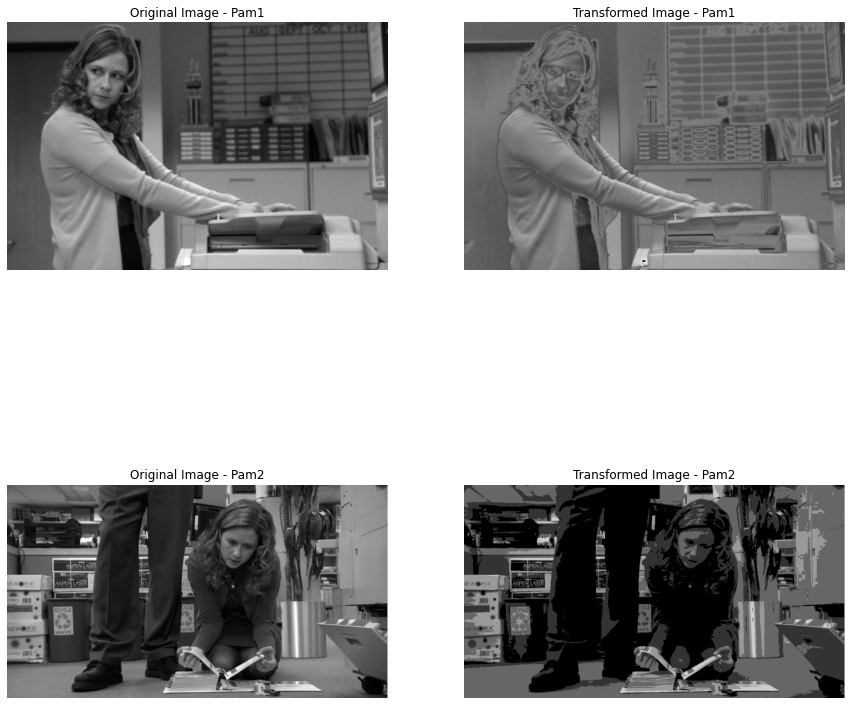

In [ ]:
imgA = cv2.imread('pam1.png')
imgB = cv2.imread('pam2.png')

# Convert to grayscale 
imgA = cv2.cvtColor(imgA, cv2.COLOR_BGR2GRAY)
imgB = cv2.cvtColor(imgB, cv2.COLOR_BGR2GRAY)

a = [0.0, 0.2, 0.4]
b = [0.2, 0.4, 1.0]
K1 = [2.0, -1.0, 1.0]
K2 = [0.1, 0.7, -0.1]

# Function call to apply piecewise linear transformation 
tr_imgA = imgA.copy()
tr_imgA = piecewiseLinTransform(tr_imgA, K1, K2, a, b)
imgA = cv2.cvtColor(imgA, cv2.COLOR_BGR2RGB)
tr_imgA = cv2.cvtColor(tr_imgA, cv2.COLOR_BGR2RGB)
A = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
B = [0.2, 0.4, 0.6, 0.8, 1.0, 1.0]
K12 = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
K22 = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
tr_imgB = imgB.copy()
tr_imgB = piecewiseLinTransform(tr_imgB, K12, K22, A, B)
imgB = cv2.cvtColor(imgB, cv2.COLOR_BGR2RGB)
tr_imgB = cv2.cvtColor(tr_imgB, cv2.COLOR_BGR2RGB)

# Plotting 
plt.figure(figsize = [15, 15])
plt.subplot(221)
plt.imshow(imgA)
plt.axis('off')
plt.title('Original Image - Pam1')
plt.subplot(222)
plt.imshow(tr_imgA)
plt.axis('off')
plt.title('Transformed Image - Pam1')
plt.subplot(223)
plt.imshow(imgB)
plt.axis('off')
plt.title('Original Image - Pam2')
plt.subplot(224)
plt.imshow(tr_imgB)
plt.axis('off')
plt.title('Transformed Image - Pam2')

### Part 3

Text(0.5, 1.0, 'Transformed Image')

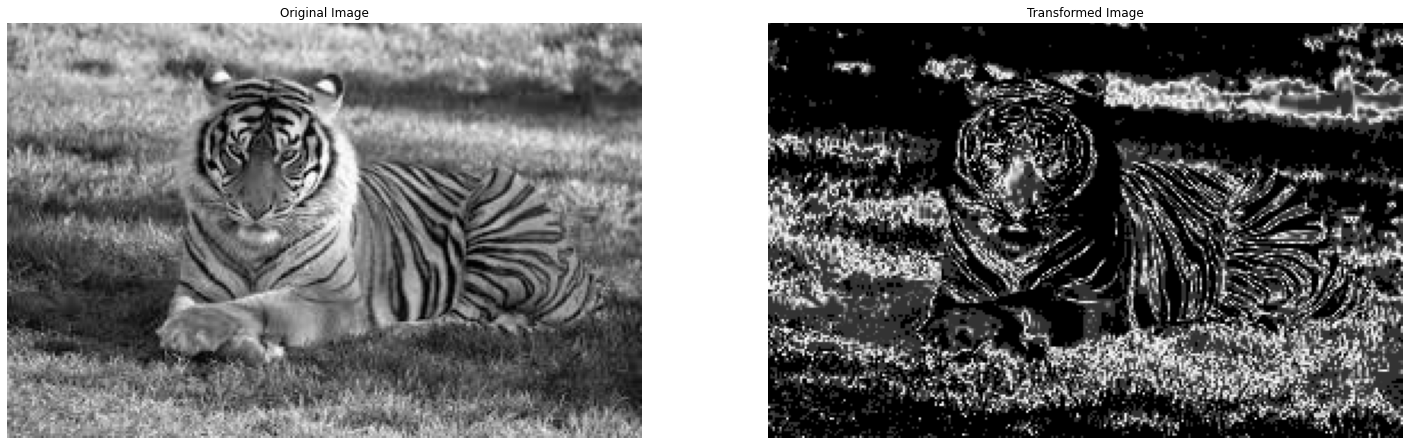

In [ ]:
temp = cv2.imread("/content/drive/MyDrive/images/images.jpeg")
img = cv2.cvtColor(temp, cv2.COLOR_BGR2GRAY)

k1 = [0,0,8,-8,0,0]
k2 = [0,0.2,-1.4,3.4,0.2,0]
a = [0,0.1,0.2,0.3,0.4,0.5]
b = [0.1,0.2,0.3,0.4,0.5,1]

# Function call to apply piecewise linear transformation 
tr_img = img.copy()
tr_img = piecewiseLinTransform(tr_img, k1, k2, a, b)
tr_img = cv2.cvtColor(tr_img, cv2.COLOR_BGR2RGB)

# Plotting
plt.figure(figsize = [25, 25])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.subplot(121)
plt.imshow(img)
plt.axis('off')
plt.title('Original Image')
plt.subplot(122)
plt.imshow(tr_img)
plt.axis('off')
plt.title('Transformed Image')
